# Read and understand the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [22]:
#drop the column "veil-color" since it has only 1 unique value
df.drop(["veil-type"],axis=1, inplace=True)

<div style='background-color:navy; color:white; padding:20px'>
    <li> The class is balanced with 4208 instances belonging to class 0, and 3916 instances belonging to class 1.
    <li> One feature was removed from the dataset since it contains only 01 unique value.
</div>

## Cramer´s V correlation:

Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic.

$$\phi_c = \sqrt{\frac{\chi^2}{N(k - 1)}}$$

In [23]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix_ = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix_)[0]
    n = confusion_matrix_.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix_.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [24]:
cramers = pd.DataFrame()
for i, a in enumerate(df.columns):
    cramers.loc[a, a] = 1
    for b in df.columns[:i]:
        val = round(cramers_v(df[a], df[b]), 2)
        cramers.loc[a,b] = val
        cramers.loc[b,a] = val
cramers.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.24,0.20,0.22,0.50,0.97,0.13,0.35,0.54,0.68,...,0.59,0.57,0.52,0.51,0.15,0.21,0.60,0.75,0.49,0.44
cap-shape,0.24,1.00,0.20,0.17,0.25,0.24,0.15,0.08,0.35,0.23,...,0.16,0.11,0.21,0.17,0.22,0.20,0.21,0.25,0.24,0.27
cap-surface,0.20,0.20,1.00,0.22,0.13,0.24,0.21,0.34,0.28,0.26,...,0.14,0.17,0.25,0.26,0.13,0.10,0.22,0.23,0.26,0.25
cap-color,0.22,0.17,0.22,1.00,0.22,0.33,0.25,0.40,0.47,0.28,...,0.25,0.32,0.27,0.28,0.15,0.34,0.56,0.28,0.30,0.33
bruises,0.50,0.25,0.13,0.22,1.00,0.66,0.14,0.30,0.37,0.65,...,0.57,0.57,0.48,0.49,0.13,0.07,0.77,0.61,0.30,0.53


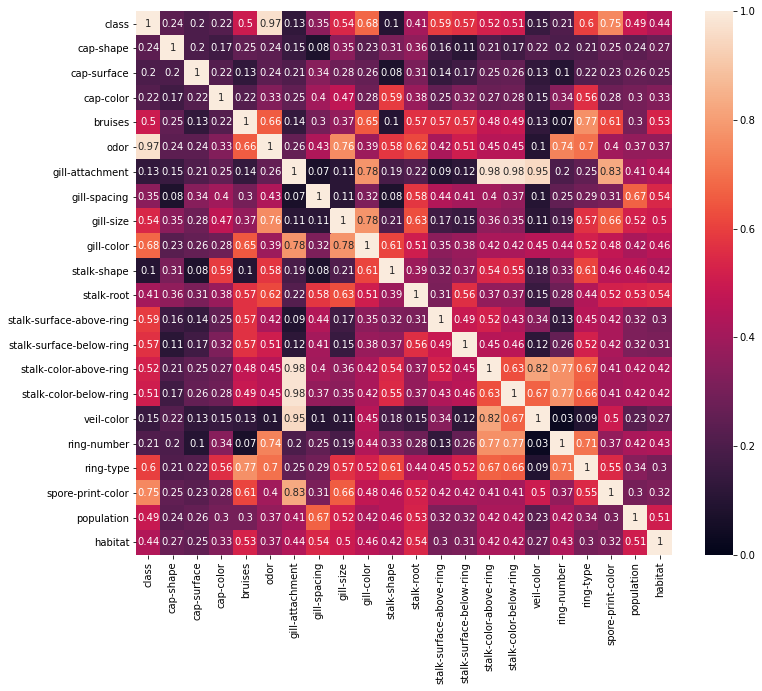

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(cramers, annot=True, vmin=0, vmax=1);

<AxesSubplot:>

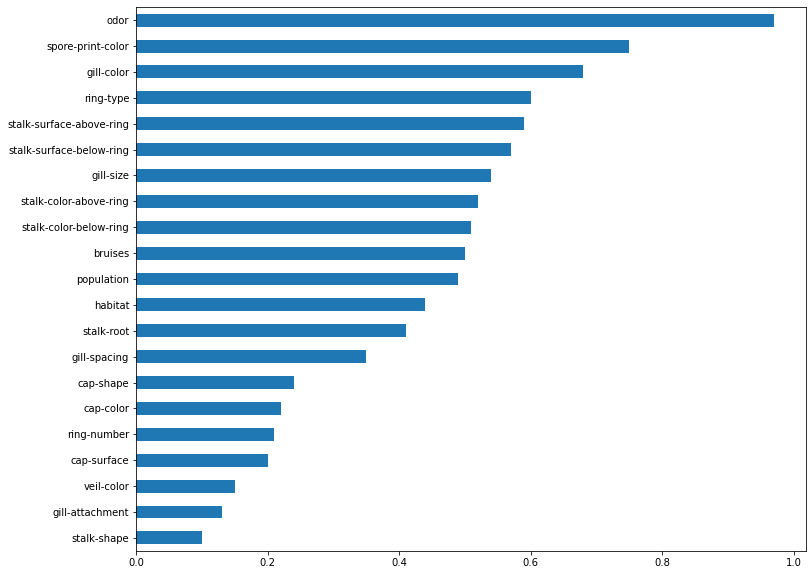

In [26]:
plt.figure(figsize=(12,10))
cramers[cramers.loc["class"] < 1]["class"].sort_values().plot(kind="barh")

<div style='background-color:navy; color:white; padding:20px'>
    <li> From the Cramer´s V, it is shown that "odor" is the feature that highest correlated with the type of mushrooms (97%), followed by "spore-print-color" and "grill-color".
    <li> The "stalk-color-above-ring","stalk-color-below-ring", "veil-color" features are highly correlated with "gill-attachment" feature. Thus, the "gill-attachment" feature will be removed.

In [27]:
df.drop(["gill-attachment"],axis=1, inplace=True)

## Import libraries and split dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier,gradient_boosting,RandomForestClassifier
import xgboost

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,plot_roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [30]:
data = pd.get_dummies(df,drop_first=True)
data.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# ML WITH ALL FEATURES

In [33]:
models_name = ["Logistic Regression", "SVC", "RandomForest", "XGBoost"]
models = [LogisticRegression(), SVC(), RandomForestClassifier(), xgboost.XGBClassifier()]
strat=StratifiedKFold(n_splits=5) #use stratified to preserve the class frequency

val_score=[]
train_score = []
test_score = []
FN = []
FP = []
for i in range(4):
    model = models[i]
    model.fit(X_train,y_train)
    val_score.append(np.mean(cross_val_score(model,X_train,y_train,cv=strat)))
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
    FN.append(confusion_matrix(y_test, model.predict(X_test))[1,0])
    FP.append(confusion_matrix(y_test, model.predict(X_test))[0,1])    

/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [34]:
pd.DataFrame({"model (no_tunning, all_features) ": models_name, "val_score": np.round(val_score,5),
              "train_score": train_score, "test_score": test_score,
              "False Negative": FN, "False Positive": FP
             })

,"model (no_tunning, all_features)",val_score,train_score,test_score,False Negative,False Positive
0,Logistic Regression,0.99912,0.999648,0.99918,2,0
1,SVC,0.99947,1.000000,1.00000,0,0
2,RandomForest,1.00000,1.000000,1.00000,0,0
3,XGBoost,1.00000,1.000000,1.00000,0,0


<div style='background-color:navy; color:white; padding:20px'>
    <li> All 4 models (no_tunning and all_features) have very good accuracy on both training score and test score.
    <li> However, SVC, RandomForest and XGBoost seemed to do a better job since they correctly all positive class (poisonous) which is one of the main target of this classification. Misclassifed poisonous mushroom (False negative) can lead to  severe health problem.
</div>

# WITH FEATURE SELECTION

## With only 1 feature

Based on the Cramer´s correlations, firstly, the most important features that are highly correlated with class will be selected

In [35]:
selected_features = cramers["class"].sort_values(ascending=False).nlargest(2).index
df_ = df[selected_features]
data_ = pd.get_dummies(df_, drop_first=True)
data_.head()
X_ = data_.iloc[:,1:]
y_ = data_.iloc[:,0]
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.3, random_state=42)
models_name = ["Logistic Regression", "SVC", "RandomForest", "XGBoost"]
models = [LogisticRegression(max_iter=1000), SVC(), RandomForestClassifier(), xgboost.XGBClassifier()]
strat=StratifiedKFold(n_splits=5) #use stratified to preserve the class frequency

val_score=[]
for i in range(4):
    model = models[i]
    model.fit(X_train_,y_train_)
    val_score.append(np.mean(cross_val_score(model,X_train_,y_train_,cv=strat)))

pd.DataFrame({"model":models_name, "val_score": np.round(val_score,6)})

/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,val_score
0,Logistic Regression,0.985753
1,SVC,0.985753
2,RandomForest,0.985753
3,XGBoost,0.985753


### SVC

In [37]:
from sklearn.model_selection import GridSearchCV

param = {"kernel": ["linear","rbf"],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid =param, n_jobs=-1, cv=5)
grid.fit(X_train_, y_train_)
print(grid.score(X_train_,y_train_))
print(grid.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid.predict(X_test_)))

0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


In [38]:
grid.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
#add more regularization to limit false negative
SVC_ = SVC(C=1000,gamma=1000,kernel="rbf")
SVC_.fit(X_train_,y_train_)
print(SVC_.score(X_train_,y_train_))
print(SVC_.score(X_test_, y_test_))
print(confusion_matrix(y_test_,SVC_.predict(X_test_)))

0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


<div style='background-color:navy; color:white; padding:20px'>
    Since the number of false negative is 39, which this classification does not aim to, more regulations were added to see if it can limit the number of false negative. However, it seems that it does not help, a another approach that is adding more features were conducted.
</div>

### LOGISTIC REGRESSION

In [43]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid =param, n_jobs=-1, cv=5)
grid_lr.fit(X_train_, y_train_)
print(grid_lr.best_params_)
print(grid_lr.score(X_train_,y_train_))
print(grid_lr.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid_lr.predict(X_test_)))

{'C': 0.1}
0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


In [44]:
lr_ = LogisticRegression(C=1000)
lr_.fit(X_train_, y_train_)
print(lr_.score(X_train_, y_train_))
print(lr_.score(X_test_,y_test_))
print(confusion_matrix(y_test_,lr_.predict(X_test_)))

0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


<div style='background-color:navy; color:white; padding:20px'>
    Similar to SVC, adding more regularization did not help limit the number of false negative. More features should be considered.
</div>

### RANDOM FOREST

In [45]:
param = {'n_estimators': [100,200,300,400,500],
        'max_depth': [i for i in range(1,10)]}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid =param, n_jobs=-1, cv=5)
grid_rf.fit(X_train_, y_train_)
print(grid_rf.best_params_)
print(grid_rf.score(X_train_,y_train_))
print(grid_rf.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid_rf.predict(X_test_)))

{'max_depth': 6, 'n_estimators': 100}
0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


### XGBOOST

In [46]:
xg = xgboost.XGBClassifier(use_label_encoder=False, n_jobs=-1, random_state=5)
xg.fit(X_train_, y_train_)
print(xg.score(X_train_,y_train_))
print(xg.score(X_test_, y_test_))
print(confusion_matrix(y_test_,xg.predict(X_test_)))

[20:24:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9857544846992613
0.9840032813781788
[[1257    0]
 [  39 1142]]


## With 7 features

In [47]:
selected_features = cramers["class"].sort_values(ascending=False).nlargest(8).index
df_ = df[selected_features]
data_ = pd.get_dummies(df_, drop_first=True)
data_.head()
X_ = data_.iloc[:,1:]
y_ = data_.iloc[:,0]
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.3, random_state=42)
models_name = ["Logistic Regression", "SVC", "RandomForest", "XGBoost"]
models = [LogisticRegression(max_iter=1000), SVC(), RandomForestClassifier(), xgboost.XGBClassifier()]
strat=StratifiedKFold(n_splits=5) #use stratified to preserve the class frequency

val_score=[]
for i in range(4):
    model = models[i]
    model.fit(X_train_,y_train_)
    val_score.append(np.mean(cross_val_score(model,X_train_,y_train_,cv=strat)))

pd.DataFrame({"model":models_name, "val_score": np.round(val_score,6)})

/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hoaduong/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,val_score
0,Logistic Regression,0.99912
1,SVC,0.99912
2,RandomForest,1.00000
3,XGBoost,1.00000


<div style='background-color:navy; color:white; padding:20px'>
      I was increasing the number of features from 1, and ended up with 7 features at which the model is able to classify all the mushroom without any false negative.
</div>

In [48]:
param = {"kernel": ["linear","rbf"],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid =param, n_jobs=-1, cv=5)
grid.fit(X_train_, y_train_)
print(grid.score(X_train_,y_train_))
print(grid.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid.predict(X_test_)))

1.0
1.0
[[1257    0]
 [   0 1181]]


In [49]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid =param, n_jobs=-1, cv=5)
grid_lr.fit(X_train_, y_train_)
print(grid_lr.best_params_)
print(grid_lr.score(X_train_,y_train_))
print(grid_lr.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid_lr.predict(X_test_)))

{'C': 100}
1.0
1.0
[[1257    0]
 [   0 1181]]


In [50]:
param = {'n_estimators': [100,200,300,400,500],
        'max_depth': [i for i in range(1,10)]}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid =param, n_jobs=-1, cv=5)
grid_rf.fit(X_train_, y_train_)
print(grid_rf.best_params_)
print(grid_rf.score(X_train_,y_train_))
print(grid_rf.score(X_test_, y_test_))
print(confusion_matrix(y_test_,grid_rf.predict(X_test_)))

{'max_depth': 9, 'n_estimators': 100}
1.0
1.0
[[1257    0]
 [   0 1181]]


In [51]:
xg = xgboost.XGBClassifier(use_label_encoder=False, n_jobs=-1, random_state=5)
xg.fit(X_train_, y_train_)
print(xg.score(X_train_,y_train_))
print(xg.score(X_test_, y_test_))
print(confusion_matrix(y_test_,xg.predict(X_test_)))

[20:30:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
1.0
[[1257    0]
 [   0 1181]]


<div style='background-color:navy; color:white; padding:20px'>
      Instead of using originally 21 features, using only 7 features can help the 4 models classify perfectly. However, if one model should be selected, XGBoost is the best choice since it is super fast.
</div>